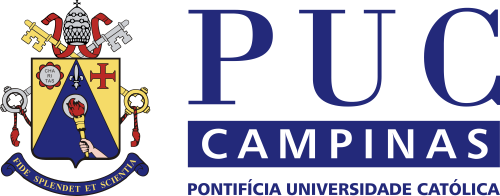



# Exercícios de Análise Exploratória de Dados 📖 🪐

*PUC - Programa de Residência em Tecnologia e Programação Python*

**Feito por:**

[Vinicius Abreu](https://www.linkedin.com/in/vs-abreu/) 👨‍💻 🚀

[Riqueli Silva](https://www.linkedin.com/in/riquelisilva/) 👩‍💻 🚀

[Laís Barreto Vieira](https://www.linkedin.com/in/lais-barreto/) 👩‍💻 🚀


**Prof. José Guilherme Picolo**


# Célula 1

Nesta célula um objeto da classe **Dados** está sendo criado. Esta classe tem métodos para ler dados de um arquivo, pré-processar esses dados (incluindo calcular médias e verificar limites), criar um DataFrame do pandas com os dados e dividir os dados em pacotes de 24 amostras. Se não houver dados válidos no arquivo ou o número de amostras não for múltiplo de 24, uma mensagem de erro será exibida.

In [238]:
# Célula 1

import pandas as pd
import numpy as np

class Dados:
    def __init__(self, path):
        self.dados = self.ler_dados(path)
        self.pacotes = self.dividir_em_pacotes(24)

        if self.dados and self.pacotes:
            self.preprocessar_dados()
        else:
            print(
                "Erro: Nenhum dado encontrado no arquivo ou número de amostras não é múltiplo de 24."
            )

    def ler_dados(self, path):
        try:
            with open(path, "r") as arquivo:
                linhas = arquivo.readlines()
                dados = []
                for linha in linhas:
                    valores = linha.strip().split()
                    if len(valores) == 4:
                        dados.append(valores)
                    else:
                        print(f"Erro: Linha inválida encontrada: {linha}")
                return dados
        except FileNotFoundError:
            print(f"Erro: Arquivo não encontrado no caminho '{path}'.")
        except Exception as e:
            print(f"Erro ao ler o arquivo: {e}")
        return None

    def preprocessar_dados(self):
        for i in range(len(self.dados) - 2):
            self.preprocessar_valor(1, i)  # Índice correspondente a 'BATIMENTO'
            self.preprocessar_valor(2, i)  # Índice correspondente a 'PRESSAO'
            self.preprocessar_valor(3, i)  # Índice correspondente a 'TEMPERATURA'

    def preprocessar_valor(self, indice, linha):
        try:
            valor = float(self.dados[linha][indice])
            if valor < 0 or valor > self.limite_superior(indice):
                self.dados[linha][indice] = self.calcular_media(indice, linha)
        except (IndexError, ValueError):
            print(f"Erro: Valor inválido na linha {linha + 1}, índice {indice}.")

    def calcular_media(self, indice, linha):
        valor_anterior = float(self.dados[linha - 1][indice])
        valor_posterior = float(self.dados[linha + 1][indice])
        return (valor_anterior + valor_posterior) / 2

    def limite_superior(self, indice):
        if indice == 1:  # 'BATIMENTO'
            return 100
        elif indice == 2:  # 'PRESSAO'
            return 20
        elif indice == 3:  # 'TEMPERATURA'
            return 40

    def criar_dataframe(self):
        colunas = [
            "HORA",
            "BATIMENTO",
            "PRESSAO",
            "TEMPERATURA",
        ]
        return pd.DataFrame(self.dados, columns=colunas)

    def dividir_em_pacotes(self, tamanho_pacote):
        if len(self.dados) % tamanho_pacote != 0:
            print("Erro: O número de amostras não é um múltiplo de 24.")
            return None
        else:
            return [
                self.dados[i : i + tamanho_pacote]
                for i in range(0, len(self.dados), tamanho_pacote)
            ]


# Célula 2

Nesta célula, uma função chamada **imprimir_dados** é definida para calcular e imprimir a média, máximo e mínimo dos valores das chaves **"BATIMENTO", "PRESSAO" e "TEMPERATURA"**. Em seguida, os dados são lidos do arquivo **"dados.txt"** usando a **classe Dados**, convertidos para um dataframe e as colunas relevantes são convertidas para tipos numéricos. As correlações entre essas colunas são calculadas e armazenadas em uma variável chamada correlacoes. No entanto, os resultados não são exibidos nesta célula.

In [239]:
# Célula 2

def imprimir_dados(dados):
    for chave in ["BATIMENTO", "PRESSAO", "TEMPERATURA"]:
        valores = dados[chave].astype(float)
        media = np.mean(valores)
        mediana = np.median(valores)
        moda = valores.mode()[0]
        desvio_padrao = np.std(valores)
        maximo = np.max(valores)
        minimo = np.min(valores)

        print("\n\n******************************************")
        print(f"{chave}")
        print("******************************************")
        print(f"Média: {media:.2f}")
        print(f"Mediana: {mediana:.2f}")
        print(f"Moda: {moda:.2f}")
        print(f"Desvio Padrão: {desvio_padrao:.2f}")
        print(f"Máximo: {maximo:.2f}")
        print(f"Mínimo: {minimo:.2f}")

path = "dados.txt"
arquivo = Dados(path)

if arquivo.dados:
    dataframe = arquivo.criar_dataframe()

    for coluna in ["BATIMENTO", "PRESSAO", "TEMPERATURA"]:
        dataframe[coluna] = pd.to_numeric(dataframe[coluna])
        correlacoes = dataframe.corr(numeric_only=True)


# Célula 3

Célula responsável por imprimir informações e correlações do dataframe criado.

In [240]:
def imprime_correlacao():
  # Imprimir correlação e estatísticas dos dados
  print("\n\n**********************************************")
  print("CORRELAÇÃO ENTRE OS PARÂMETROS")
  print("NUMERO DE AMOSTRAS/CAMPOS: ", dataframe.shape)
  print("**********************************************")
  print(correlacoes)

# Célula 4

Célula responsável pela classificação das correlações e veredito quanto as correlações.


In [241]:
# Criando analise sob as relações

class CorrelacaoAnalise:
    def __init__(self, correlacao):
        self.correlacao = correlacao

    def analisa_correlacao(self):
        if abs(self.correlacao) >= 0.7:
            return "forte"
        elif abs(self.correlacao) >= 0.4:
            return "moderada"
        elif abs(self.correlacao) >= 0.2:
            return "fraca"
        else:
            return "muito fraca"

def analisar_correlacoes(correlacoes, chaves):
    resultados = {}
    analisadas = set()  # Para evitar duplicatas e inversões
    for chave1 in chaves:
        for chave2 in chaves:
            if chave1 != chave2 and (chave2, chave1) not in analisadas:
                analise = CorrelacaoAnalise(correlacoes.loc[chave1, chave2])
                forca_correlacao = analise.analisa_correlacao()
                resultados[(chave1, chave2)] = forca_correlacao
                analisadas.add(
                    (chave1, chave2)
                )
    return resultados


# Célula 5

Célula responsável por instanciar a classe **CorrelacaoAnalise** e inserir os dados para validação e classificação da correlação.

In [242]:
# Chaves do DataFrame
chaves = ["BATIMENTO", "PRESSAO", "TEMPERATURA"]

# Realizando a análise das correlações de forma dinâmica
resultados_correlacoes = analisar_correlacoes(correlacoes, chaves)

# Organizar resultados em categorias
correlacoes_fortes = {k: v for k, v in resultados_correlacoes.items() if v == "forte"}
correlacoes_moderadas = {k: v for k, v in resultados_correlacoes.items() if v == "moderada"}
correlacoes_fracas = {k: v for k, v in resultados_correlacoes.items() if v == "fraca"}

# Imprimir resultados
print("Correlações Fortes:")
for chaves, forca_correlacao in correlacoes_fortes.items():
    print(f"Há uma correlação {forca_correlacao} entre {chaves[0]} e {chaves[1]} ({float(correlacoes.loc[chaves[0], chaves[1]]):.6f})")

print("\nCorrelações Moderadas:")
for chaves, forca_correlacao in correlacoes_moderadas.items():
    print(f"Há uma correlação {forca_correlacao} entre {chaves[0]} e {chaves[1]} ({float(correlacoes.loc[chaves[0], chaves[1]]):.6f})")

print("\nCorrelações Fracas:")
for chaves, forca_correlacao in correlacoes_fracas.items():
    print(f"Há uma correlação {forca_correlacao} entre {chaves[0]} e {chaves[1]} ({float(correlacoes.loc[chaves[0], chaves[1]]):.6f})")

Correlações Fortes:
Há uma correlação forte entre BATIMENTO e PRESSAO (0.911762)

Correlações Moderadas:
Há uma correlação moderada entre PRESSAO e TEMPERATURA (0.425382)

Correlações Fracas:
Há uma correlação fraca entre BATIMENTO e TEMPERATURA (0.399000)


# Célula 6

Célula responsável pelo cálculo dos valores: min, méd. e máx. para informativo no gráfico.

In [243]:
# Cálculo das estatísticas
min_batimento, media_batimento, max_batimento = (
    dataframe["BATIMENTO"].min(),
    dataframe["BATIMENTO"].mean(),
    dataframe["BATIMENTO"].max(),
)
min_pressao, media_pressao, max_pressao = (
    dataframe["PRESSAO"].min(),
    dataframe["PRESSAO"].mean(),
    dataframe["PRESSAO"].max(),
)
min_temperatura, media_temperatura, max_temperatura = (
    dataframe["TEMPERATURA"].min(),
    dataframe["TEMPERATURA"].mean(),
    dataframe["TEMPERATURA"].max(),
)

# Célula 7

Célula responsável pela plotagem dos gráficos.

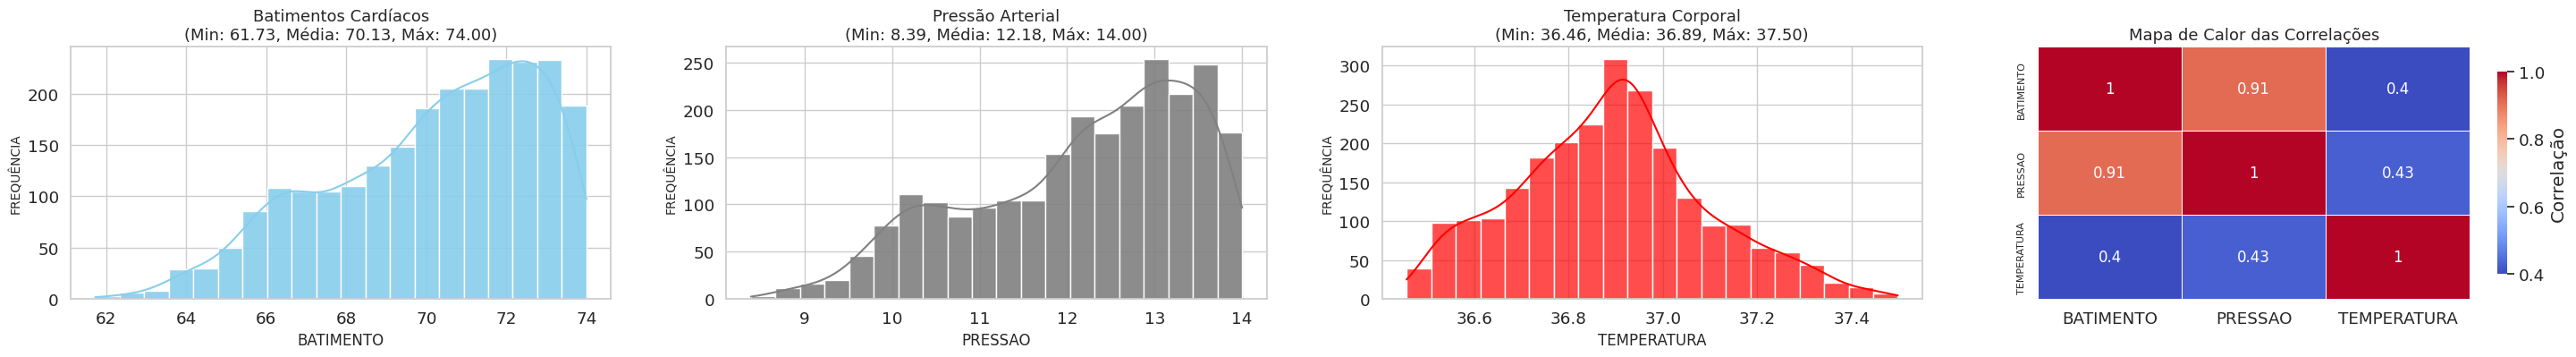



**********************************************
CORRELAÇÃO ENTRE OS PARÂMETROS
NUMERO DE AMOSTRAS/CAMPOS:  (2400, 4)
**********************************************
             BATIMENTO   PRESSAO  TEMPERATURA
BATIMENTO     1.000000  0.911762     0.399000
PRESSAO       0.911762  1.000000     0.425382
TEMPERATURA   0.399000  0.425382     1.000000


******************************************
BATIMENTO
******************************************
Média: 70.13
Mediana: 70.63
Moda: 70.69
Desvio Padrão: 2.63
Máximo: 74.00
Mínimo: 61.73


******************************************
PRESSAO
******************************************
Média: 12.18
Mediana: 12.43
Moda: 12.35
Desvio Padrão: 1.26
Máximo: 14.00
Mínimo: 8.39


******************************************
TEMPERATURA
******************************************
Média: 36.89
Mediana: 36.89
Moda: 36.46
Desvio Padrão: 0.20
Máximo: 37.50
Mínimo: 36.46


In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo do Seaborn e do matplotlib
sns.set(style="whitegrid", font_scale=1.2)

# Criação da matriz de subplots (1 linha, 4 colunas)
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

# Subplot para o histograma de 'BATIMENTO'
sns.histplot(data=dataframe["BATIMENTO"], bins=20, color="skyblue", alpha=0.9, kde=True, ax=axs[0])
axs[0].set_xlabel("BATIMENTO", fontsize=12)
axs[0].set_ylabel("FREQUÊNCIA", fontsize=10)
axs[0].set_title(f"Batimentos Cardíacos\n(Min: {min_batimento:.2f}, Média: {media_batimento:.2f}, Máx: {max_batimento:.2f})", fontsize=13)

# Subplot para o histograma de 'PRESSAO'
sns.histplot(data=dataframe["PRESSAO"], bins=20, color="grey", alpha=0.9, kde=True, ax=axs[1])
axs[1].set_xlabel("PRESSAO", fontsize=12)
axs[1].set_ylabel("FREQUÊNCIA", fontsize=10)
axs[1].set_title(f"Pressão Arterial\n(Min: {min_pressao:.2f}, Média: {media_pressao:.2f}, Máx: {max_pressao:.2f})", fontsize=13)

# Subplot para o histograma de 'TEMPERATURA'
sns.histplot(data=dataframe["TEMPERATURA"], bins=20, color="red", alpha=0.7, kde=True, ax=axs[2])
axs[2].set_xlabel("TEMPERATURA", fontsize=12)
axs[2].set_ylabel("FREQUÊNCIA", fontsize=10)
axs[2].set_title(f"Temperatura Corporal\n(Min: {min_temperatura:.2f}, Média: {media_temperatura:.2f}, Máx: {max_temperatura:.2f})", fontsize=13)

# Subplot para o heatmap
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 12}, cbar_kws={'label': 'Correlação', 'shrink': 0.8}, ax=axs[3])
axs[3].set_yticklabels(["BATIMENTO", "PRESSAO", "TEMPERATURA"], fontsize=8)  # Reduz o tamanho da fonte dos rótulos y
axs[3].set_title('Mapa de Calor das Correlações', fontsize=13)

# Ajusta o layout
plt.tight_layout(pad=3.0)

# Exibe os gráficos na saída da célula
plt.show()

# Impressões
imprime_correlacao()
imprimir_dados(dataframe)


# Análise dos Gráficos 📈

É possível estabelecer uma relação forte entre Batimento e Pressão.
A ível que os batimentos sobem a pressão também sobe, há uma **relação forte** de **(0.91)**

Já a temperatura tem **relações fracas**, uma relação moderada pode ser estabelecida entre pressão e temperatura, a nível que a pressão sobre a temperatura tende a subir e reduzir.


**Resultados encontrados: 🎯**

Há uma **correlação muito forte ✅** e positiva entre BATIMENTO CARDIACO e PRESSAO ARTERIAL (0.911762).

Há uma **correlação positiva moderada ❗** entre PRESSAO ARTERIAL e TEMPERATURA CORPORAL (0.425382).


# Correlação Batimento cardíaco x Pressão Arterial 📊

A correlação encontrada de **0,91** entre o batimento cardíaco e a pressão arterial revela uma relação muito forte e positiva entre essas duas variáveis. Isso significa que, em geral, quando o batimento cardíaco aumenta, a pressão arterial tende a aumentar também, e vice-versa. Vamos analisar essa descoberta considerando os aspectos estatísticos e as possíveis explicações para esse fenômeno.


O coeficiente de correlação de 0,91 indica uma associação quase linear muito forte entre o batimento cardíaco e a pressão arterial. Esse valor próximo de 1 sugere que as mudanças nas duas variáveis estão altamente interligadas. Em termos estatísticos, essa relação é estatisticamente significativa e robusta.


Essa forte correlação pode ser crucial na compreensão de padrões fisiológicos ou condições médicas em que as variações no batimento cardíaco estão intimamente ligadas às alterações na pressão arterial. As possíveis explicações envolvem:

**1. Fisiologia Humana:** O batimento cardíaco (frequência cardíaca) e a pressão arterial estão intrinsecamente relacionados. A contração do coração influencia diretamente a pressão sanguínea.

**2. Regulação do Sistema Nervoso Autônomo:** O sistema nervoso autônomo desempenha um papel fundamental na regulação do batimento cardíaco e da pressão arterial. Mudanças na atividade simpática (aceleração do batimento cardíaco) e parassimpática (desaceleração do batimento cardíaco) podem influenciar ambos os parâmetros.

**3. Resposta ao Estresse:** Situações de estresse ou excitação podem resultar em um aumento simultâneo do batimento cardíaco e da pressão arterial. Isso é uma resposta fisiológica natural ao preparar o corpo para lidar com desafios iminentes.

**4. Condições Médicas:** Certas condições médicas, como hipertensão arterial, podem contribuir para uma correlação forte entre o batimento cardíaco e a pressão arterial.

Essa forte correlação entre o batimento cardíaco e a pressão arterial é um achado significativo e pode ter implicações importantes na compreensão da saúde cardiovascular e em contextos clínicos.


# Critérios para Tomada de Decisão: ⏳ ☠

**Alerta de Frequência Cardíaca Elevada 👨‍⚕️ :** Se a média dos batimentos cardíacos em um pacote for consistentemente superior a 90 bpm, pode ser um indicador de taquicardia e requer avaliação médica.


**Alerta de Pressão Alta 🆙❗ :** Se a média da pressão arterial em um pacote for consistentemente superior a 15 mmHg (ou outro limiar definido), isso pode indicar hipertensão e requer acompanhamento médico.


**Alerta de Temperatura Corporal Anormal:** Alerta se a média da temperatura corporal em um pacote estiver fora da faixa considerada normal (ex: 36.5°C - 37.5°C).